# **Notebook - Análisis Predictivo de Índices Bursátiles**
## Grupo 001 - Lunes 7-10 PM
## Equipo 9
+ 1842161 Torres Guerrero Saul Ángel
+ 1844656 Maldonado Ramirez Alejandra
+ 1857712 Morales Tovar Carlos de Jesús
+ 1941500 Espinosa Orrante Jesús Alejandro
+ 1857810 Rivera Castillo Saúl Andrés



## **Stock Exchange Data** 
URL: https://www.kaggle.com/mattiuzc/stock-exchange-data 

### **Descripción de los datos** 

 
*   Esta base contiene datos diarios de los puntos (o precios) de índices bursátiles de todo el mundo como: Estados Unidos, Canadá, Japón, Alemania, China, etc. Estos datos que nos muestran son recopilados de Yahoo Finance y son cotizados en la moneda nacional en donde se encuentra cada cambio, además de su precio de cierre convertido al dólar estadounidense.

* Un **índice bursátil** es un indicador de la bolsa de valores que actúa como un termómetro: tiene la capacidad de hacernos ver, en un solo vistazo, el movimiento mayoritario de las empresas de dicho mercado. 

**Descripción de columnas**

Los tipos de datos que nos presentan son en su mayoría números, enteros o decimales, también nos dan fechas.

* Index: Siglas del índice
* Date: Fecha de observación
* Open: Precio de apertura
* High: Precio más alto que tuvo el índice en todo el día
* Low: Precio más bajo que tuvo el índice en todo el día
* Close: Precio de cierre, es decir el precio con el que la acción termino el día
* Adj Close: Precio de cierre ajustado a dividendos y divisiones, prácticamente es igual al precio de cierre
* Volume: Número de acciones que se negociaron en el día
* CloseUSD: Precio de cierre en dólares




### **Justificación del uso de Datos** 


  * Una de las características que nos llamó más la atención es que la base nos muestra diferentes índices bursátiles y sus valores con el paso del tiempo, teniendo referencia de otras materias como Productos Financieros Derivados sobre los tipos de inversiones que se pueden realizar con los índices nos empujó a considerar esta base.

*   Lo que nos beneficia de trabajar con esta base de datos es tener información organizada sobre distintos índices de todo el mundo, además de una columna dedicada a convertir todos los precios al dolár estadounidense lo cual hace la información más manejable.

### **Objetivos** 


*   Objetivo Principal: Realizar predicciones sobre los índices bursátiles.

*   Objetivo Secundario: Comparar el comportamiento de los índices a través del tiempo.






   









## **DESARROLLO DE HERRAMIENTAS**  
### **1. Limpieza de Datos** 

In [ ]:
import pandas as pd
import numpy as np
import json
#Importando la base de datos bajo el nombre IP
IP = pd.read_csv("indexProcessed.csv", encoding='utf8')

In [ ]:
#Cantidad de filas y columnas
IP.shape

(104224, 9)

In [ ]:
#Mostrando las primeras 6 filas de la base de datos IP
IP.head(6)

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013
5,HSI,1987-01-08,2603.300049,2603.300049,2603.300049,2603.300049,2603.300049,0.0,338.429006


In [ ]:
#Desplegando el nombre de todas las columnas que conforman la base de datos IP
IP.columns

Index(['Index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'CloseUSD'],
      dtype='object')

In [ ]:
#Indicando el tipo de dato que contiene cada columna de la base de datos IP
#Verificando la presencia o no de datos nulos en cada columna de la base de datos IP
for i in range(0,9):
    print("La columna",IP.columns[i],"contiene datos de tipo",IP[IP.columns[i]].dtype)
    DN=IP.isnull().any()[IP.columns[i]]
    if DN == False:
      print("La columna",IP.columns[i],"no presenta datos nulos")
      print()
    else:
      print("La columna",IP.columns[i],"presenta",IP.isnull().sum()[IP.columns[i]],"datos nulos")
      print()

La columna Index contiene datos de tipo object
La columna Index no presenta datos nulos

La columna Date contiene datos de tipo object
La columna Date no presenta datos nulos

La columna Open contiene datos de tipo float64
La columna Open no presenta datos nulos

La columna High contiene datos de tipo float64
La columna High no presenta datos nulos

La columna Low contiene datos de tipo float64
La columna Low no presenta datos nulos

La columna Close contiene datos de tipo float64
La columna Close no presenta datos nulos

La columna Adj Close contiene datos de tipo float64
La columna Adj Close no presenta datos nulos

La columna Volume contiene datos de tipo float64
La columna Volume no presenta datos nulos

La columna CloseUSD contiene datos de tipo float64
La columna CloseUSD no presenta datos nulos



In [ ]:
#Eliminando columnas
NIP=IP.drop(columns=['Open','High','Low','Close','Adj Close','Volume'])
NIP.head(6)

,Index,Date,CloseUSD
0,HSI,1986-12-31,333.879006
1,HSI,1987-01-02,330.213013
2,HSI,1987-01-05,331.811987
3,HSI,1987-01-06,335.906987
4,HSI,1987-01-07,338.923013
5,HSI,1987-01-08,338.429006


Se eliminaron las columnas Open, High, Low, Close y Adj Close porque para nuestro objetivo lo más eficiente es tener todos los datos en la misma moneda (USD), aparte de que eran redundantes entre ellas. Además, eliminamos la columna de Volumen dado que no es relevante para nuestros objetivos.

### **2. Estadística básica de los datos** 


In [ ]:
#Resumen estadístico de la columna CloseUSD
NIP['CloseUSD'].describe()

count    104224.000000
mean       3046.729177
std        3747.865623
min          10.204900
25%         320.460898
50%        1371.598486
75%        4383.045241
max       18934.376173
Name: CloseUSD, dtype: float64

In [ ]:
NYA=NIP[NIP.Index=="NYA"]

In [ ]:
#Resumen estadístico de la columna CloseUSD solo del índice NYA
NYA['CloseUSD'].describe()

count    13947.000000
mean      4452.174711
std       4075.459366
min        347.769989
25%        654.940002
50%       2631.800049
75%       7337.935059
max      16590.429690
Name: CloseUSD, dtype: float64

Con el resumen estadístico encontramos que tenemos una gran cantidad de observaciones del índice NYA y un promedio de puntos mayor al que se tiene de todos los índices en general.

## **3. Gráficas** 

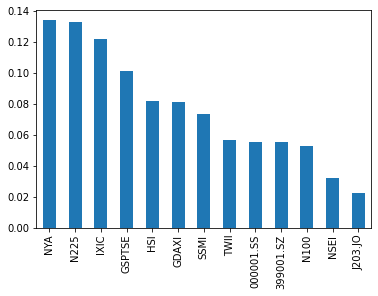

In [ ]:
(NIP['Index'].value_counts() / len(NIP)).plot.bar()

Con esta gráfica nos podemos dar cuenta que el índice "NYA" abarca el mayor porcentaje de observaciones, para tener gráficas con resultados más específicos podemos realizarlos con los datos de este índice.

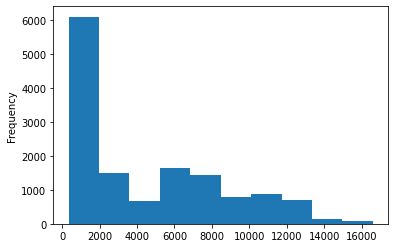

In [ ]:
NYA['CloseUSD'].plot.hist()

Observamos que la mayor parte de las observaciones de puntos del índice están situadas en el intervalo de 347 a 2000

In [ ]:
NNIP = pd.read_csv("indexProcessed.csv",parse_dates=['Date'],index_col= ['Date'])

In [ ]:
NNYA=NNIP[NNIP.Index=="NYA"]
NNYA.head(5)

,Index,Open,High,Low,Close,Adj Close,Volume,CloseUSD
Date,,,,,,,,
1965-12-31,NYA,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,528.690002
1966-01-03,NYA,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,527.210022
1966-01-04,NYA,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,527.840027
1966-01-05,NYA,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,531.119995
1966-01-06,NYA,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,532.070007


In [ ]:
ENYA=NNYA.drop(columns=['Open','High','Low','Close','Adj Close','Volume'])
ENYA.head(6)

,Index,CloseUSD
Date,,
1965-12-31,NYA,528.690002
1966-01-03,NYA,527.210022
1966-01-04,NYA,527.840027
1966-01-05,NYA,531.119995
1966-01-06,NYA,532.070007
1966-01-07,NYA,532.599976


In [ ]:
IPP = ENYA['2020-01-01':'2021-01-01']
IPP.head()

,Index,CloseUSD
Date,,
2020-01-02,NYA,14002.49023
2020-01-03,NYA,13917.04981
2020-01-06,NYA,13941.79981
2020-01-07,NYA,13898.45020
2020-01-08,NYA,13934.44043


In [ ]:
IPP.reset_index()

,Date,Index,CloseUSD
0,2020-01-02,NYA,14002.49023
1,2020-01-03,NYA,13917.04981
2,2020-01-06,NYA,13941.79981
3,2020-01-07,NYA,13898.45020
4,2020-01-08,NYA,13934.44043
...,...,...,...
248,2020-12-24,NYA,14382.50000
249,2020-12-28,NYA,14405.76953
250,2020-12-29,NYA,14397.91992
251,2020-12-30,NYA,14477.48047


Realizamos los pasos anteriores para aislar el intervalo que comprende el año 2020 y de esa forma la gráfica de dispersión se pueda entender mejor

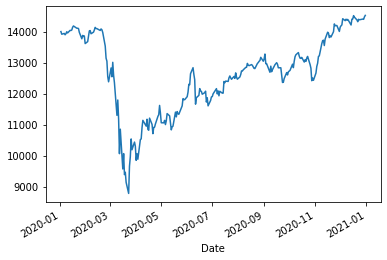

In [ ]:
IPP["CloseUSD"].plot.line()

Con la gráfica de dispersión del 2020 para el índice NYA podemos ver que se vio afectado en el primer trimestre muy probablemente debido a los efectos del COVID-19 en la economía mundial, recuperandose poco a poco a lo largo del año.

In [ ]:
N225=NNIP[NNIP.Index=="N225"]
N225.head(5)

,Index,Open,High,Low,Close,Adj Close,Volume,CloseUSD
Date,,,,,,,,
1965-01-05,N225,1257.719971,1257.719971,1257.719971,1257.719971,1257.719971,0.0,12.577200
1965-01-06,N225,1263.989990,1263.989990,1263.989990,1263.989990,1263.989990,0.0,12.639900
1965-01-07,N225,1274.270020,1274.270020,1274.270020,1274.270020,1274.270020,0.0,12.742700
1965-01-08,N225,1286.430054,1286.430054,1286.430054,1286.430054,1286.430054,0.0,12.864301
1965-01-12,N225,1288.540039,1288.540039,1288.540039,1288.540039,1288.540039,0.0,12.885400


In [ ]:
EN225=N225.drop(columns=['Open','High','Low','Close','Adj Close','Volume'])
EN225.head(6)

,Index,CloseUSD
Date,,
1965-01-05,N225,12.577200
1965-01-06,N225,12.639900
1965-01-07,N225,12.742700
1965-01-08,N225,12.864301
1965-01-12,N225,12.885400
1965-01-13,N225,12.816700


In [ ]:
N2P = EN225['2020-01-01':'2021-01-01']
N2P.head()

,Index,CloseUSD
Date,,
2020-01-06,N225,232.048594
2020-01-07,N225,235.757207
2020-01-08,N225,232.047598
2020-01-09,N225,237.398691
2020-01-10,N225,238.505703


In [ ]:
N2P.reset_index()

,Date,Index,CloseUSD
0,2020-01-06,N225,232.048594
1,2020-01-07,N225,235.757207
2,2020-01-08,N225,232.047598
3,2020-01-09,N225,237.398691
4,2020-01-10,N225,238.505703
...,...,...,...
237,2020-12-24,N225,266.683496
238,2020-12-25,N225,266.566094
239,2020-12-28,N225,268.540293
240,2020-12-29,N225,275.681504


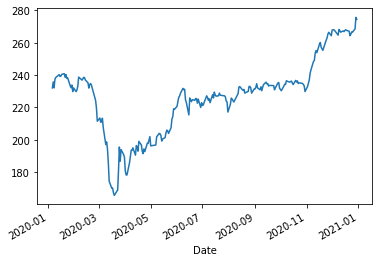

In [ ]:
N2P["CloseUSD"].plot.line()

Comparando la gráfica de dispersión del índice N225 de Japón del año 2020 con la del NYA podemos apreciar que son bastante similares, esto debido a que ambos mercados se vieron afectados por la pandemia. Si revisaramos todos los índices disponibles en la base probablemente encontraríamos la misma situación. 

Text(0.5, 1.0, 'N225')

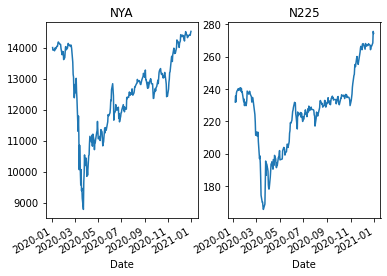

In [ ]:
#Comparación
from pylab import *
subplot(1,2,1)
IPP["CloseUSD"].plot.line()
plt.title("NYA")
subplot(1,2,2)
N2P["CloseUSD"].plot.line()
plt.title("N225")

In [ ]:
TI=NNIP[(NNIP["Index"]=="NYA") | (NNIP["Index"]=="N225")| (NNIP["Index"]=="HSI") | (NNIP["Index"]=="IXIC") | (NNIP["Index"]=="GSPTSE")]
TI.head()

,Index,Open,High,Low,Close,Adj Close,Volume,CloseUSD
Date,,,,,,,,
1986-12-31,HSI,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1987-01-02,HSI,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
1987-01-05,HSI,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
1987-01-06,HSI,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
1987-01-07,HSI,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013


In [ ]:
NTI=TI.drop(columns=['Open','High','Low','Close','Adj Close','Volume'])
NTI.head()

,Index,CloseUSD
Date,,
1986-12-31,HSI,333.879006
1987-01-02,HSI,330.213013
1987-01-05,HSI,331.811987
1987-01-06,HSI,335.906987
1987-01-07,HSI,338.923013


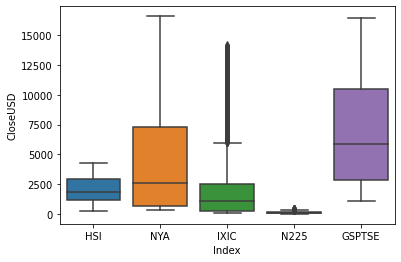

In [ ]:
import seaborn as sns
sns.boxplot(x='Index', y='CloseUSD', data=NTI)

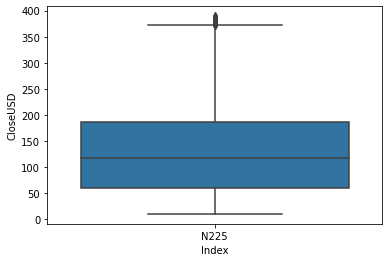

In [ ]:
NT225=NTI[NTI.Index=="N225"]
sns.boxplot(x='Index', y='CloseUSD', data=NT225)

Comparando los boxplot, notamos que el índice HSI es el más "estable" a través del tiempo por lo que sería el más facil de predecir para un futuro cercano. Esto se debe a que la mayoría de los precios de cierre se encuentran dentro de la caja provocando así que sus bigotes no sean tan largos. Por el contrario, el índice IXIC es el más "volatil" ya que presenta demasiados datos atípicos. 

## **Conclusión General**

Con los resumenes estadísticos y las gráficas de barras nos dimos cuenta que el índice NYA de la NYSE era el que tenía mayor número de observaciones en nuestra base de datos y su promedio está por encima del general. Gracias a lo anterior empezamos a tomar en cuenta el NYA para realizar comparaciones entre los índices, el cual es nuestro objetivo secundario.

Se decidió descartar dos índices debido a que presentaban bastante datos atípicos en sus precios de cierre, haciéndolos los más volátiles y por ende complicados de predecir. Dichos índices fueron el "IXIC" y "N225".

# **Aplicando la técnica de Series de Tiempo**

https://www.pluralsight.com/guides/advanced-time-series-modeling-(arima)-models-in-python

**¿Por qué elegimos la técnica de Series de Tiempo?**

El análisis de series de tiempo es útil para predecir valores futuros, el cual es nuestro objetivo principal. Por lo general, un extenso conjunto de datos garantiza que se tenga un tamaño de muestra representativo y que el análisis realizado sea confiable. Para nuestro análisis decidimos que con poco más de 330 observaciones era suficiente tomando en cuenta que la regla general (según el libro "Intervention Analysis with Applications to Economic and Environmental Problems" de Box y Tiao) es que preferentemente se tengan más de 100 observaciones.

Al implementar un modelo ARIMA se puede pronosticar y analizar una serie de tiempo utilizando valores pasados, como predecir precios futuros basados ​​en ganancias históricas.



## NYA

In [ ]:
RPP = ENYA['2020-01-01':'2021-05-01']
RPP.head()

,Index,CloseUSD
Date,,
2020-01-02,NYA,14002.49023
2020-01-03,NYA,13917.04981
2020-01-06,NYA,13941.79981
2020-01-07,NYA,13898.45020
2020-01-08,NYA,13934.44043


### Revisando estacionariedad en media

In [ ]:
import matplotlib.pyplot as plt
x = np.arange(RPP.reset_index()['Date'].size)
fit = np.polyfit(x, RPP['CloseUSD'], deg=1)
print ("Slope : " + str(fit[0]))
print ("Intercept : " + str(fit[1]))

Slope : 12.099763050321425
Intercept : 11285.917567309754


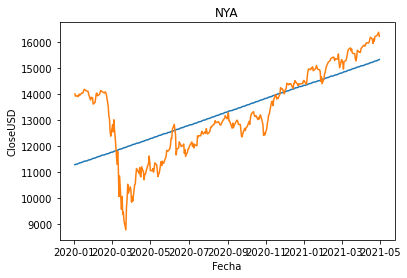

In [ ]:
fit_function = np.poly1d(fit)
plt.plot(RPP.reset_index()['Date'], fit_function(x))
plt.plot(RPP.reset_index()['Date'], RPP['CloseUSD'])

plt.xlabel('Fecha')
plt.ylabel('CloseUSD')
plt.title('NYA')
plt.show()

Visualmente parece que se tiene tendencia lineal

In [ ]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = np.arange(RPP.reset_index()['Date'].size).reshape(-1, 1)
y2 = RPP['CloseUSD']
X3 = sm.add_constant(X2)
est2 = sm.OLS(y2, X3)
est3 = est2.fit()
print(est3.summary())

                            OLS Regression Results                            
Dep. Variable:               CloseUSD   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     343.9
Date:                Mon, 18 Oct 2021   Prob (F-statistic):           3.11e-53
Time:                        18:51:04   Log-Likelihood:                -2836.7
No. Observations:                 335   AIC:                             5677.
Df Residuals:                     333   BIC:                             5685.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.129e+04    125.916     89.631      0.0

#### Prueba de hipótesis

H0: la serie no tiene tendencia

H1: la serie tiene tendencia

Criterio: Rechazamos H0 si p-valor<alfa(0.05)

P-valor=0.000<0.05, con un 95% de confianza rechazamos H0

**La serie es no estacionaria en media**

### Revisando estacionariedad en varianza con la Prueba Dickey-Fuller Aumentada

In [ ]:
RPP2=RPP.drop(columns=['Index'])
RPP2.head(6)

,CloseUSD
Date,
2020-01-02,14002.49023
2020-01-03,13917.04981
2020-01-06,13941.79981
2020-01-07,13898.45020
2020-01-08,13934.44043
2020-01-09,13997.65039


In [ ]:
#Definiendo función para la Prueba Dickey-Fuller
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Resultados de la prueba Dickey-Fuller:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-valor','#Lags Used','Numero de observaciones usadas'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

adf_test(RPP2['CloseUSD'])

Resultados de la prueba Dickey-Fuller:
Test Statistic                     -0.949656
p-valor                             0.771181
#Lags Used                          9.000000
Numero de observaciones usadas    325.000000
Critical Value (1%)                -3.450632
Critical Value (5%)                -2.870474
Critical Value (10%)               -2.571530
dtype: float64


#### Prueba de hipótesis
H0: la serie no es estacionaria

H1: la serie es estacionaria

Criterio: Rechazamos H0 si p-valor<alfa(0.05)

P-valor=0.771181>0.05, con un 95% de confianza no rechazamos H0

**La serie es no estacionaria en varianza**

## **Se tiene que corregir la serie para hacerse estacionaria**

### Correcciones

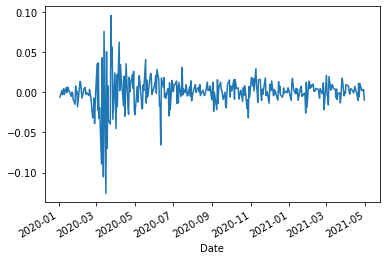

In [ ]:
RPP2['CloseUSD_log'] = np.log(RPP2['CloseUSD'])
RPP2['CloseUSD_log_diff'] = RPP2['CloseUSD_log'] - RPP2['CloseUSD_log'].shift(1)
RPP2['CloseUSD_log_diff'].dropna().plot()

### Revisando estacionariedad en media

In [ ]:
RPP2_c = RPP2.reset_index().drop([0], axis=0)
RPP2_c

,Date,CloseUSD,CloseUSD_log,CloseUSD_log_diff
1,2020-01-03,13917.04981,9.540870,-0.006120
2,2020-01-06,13941.79981,9.542647,0.001777
3,2020-01-07,13898.45020,9.539533,-0.003114
4,2020-01-08,13934.44043,9.542119,0.002586
5,2020-01-09,13997.65039,9.546645,0.004526
...,...,...,...,...
330,2021-04-26,16241.20996,9.695307,0.002170
331,2021-04-27,16273.30957,9.697282,0.001974
332,2021-04-28,16322.12988,9.700277,0.002996
333,2021-04-29,16376.00000,9.703572,0.003295


In [ ]:
x = np.arange(RPP2_c['Date'].size)
fit = np.polyfit(x,RPP2_c['CloseUSD_log_diff'], deg=1)
print ("Slope : " + str(fit[0]))
print ("Intercept : " + str(fit[1]))

Slope : 1.4280063356096332e-05
Intercept : -0.0019376049249305346


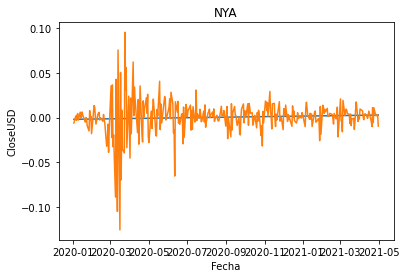

In [ ]:
fit_function = np.poly1d(fit)
plt.plot(RPP2_c['Date'], fit_function(x))
plt.plot(RPP2_c['Date'], RPP2_c['CloseUSD_log_diff'])

plt.xlabel('Fecha')
plt.ylabel('CloseUSD')
plt.title('NYA')
plt.show()

Visualmente parece que no se tiene tendencia

In [ ]:
X = np.arange(RPP2_c['Date'].size).reshape(-1, 1)
y = RPP2_c['CloseUSD_log_diff']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:      CloseUSD_log_diff   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.639
Date:                Mon, 18 Oct 2021   Prob (F-statistic):              0.201
Time:                        19:48:38   Log-Likelihood:                 839.54
No. Observations:                 334   AIC:                            -1675.
Df Residuals:                     332   BIC:                            -1667.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0019      0.002     -0.903      0.3

#### Prueba de hipótesis

H0: la serie no tiene tendencia

H1: la serie tiene tendencia

Criterio: Rechazamos H0 si p-valor<alfa(0.05)

P-valor=0.201>0.05, con un 95% de confianza no rechazamos H0

**La serie es estacionaria en media**


### Revisando estacionariedad en varianza con la Prueba Dickey-Fuller Aumentada



In [ ]:
adf_test(RPP2['CloseUSD_log_diff'].dropna())

Resultados de la prueba Dickey-Fuller:
Test Statistic                     -4.974196
p-valor                             0.000025
#Lags Used                          8.000000
Numero de observaciones usadas    325.000000
Critical Value (1%)                -3.450632
Critical Value (5%)                -2.870474
Critical Value (10%)               -2.571530
dtype: float64


#### Prueba de hipótesis
H0: la serie no es estacionaria

H1: la serie es estacionaria

Criterio: Rechazamos H0 si p-valor<alfa(0.05)

P-valor=0.000025<0.05, con un 95% de confianza rechazamos H0

**La serie es estacionaria en media y varianza**

## **Modelo ARIMA**

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 8.8 MB/s 
     |████████████████████████████████| 9.8 MB 38.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pmdarima as pmd

def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              trace=True)
    return autoarima_model

In [ ]:
arima_model = arimamodel(RPP2['CloseUSD_log_diff'].dropna())
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1697.706, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1673.430, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1693.007, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1685.858, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1675.262, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1706.530, Time=0.61 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1707.184, Time=0.20 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1708.399, Time=0.12 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-1715.689, Time=0.10 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-1718.289, Time=0.42 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-1738.521, Time=1.18 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1737.924, Time=0.87 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-1732.126, Time=1.40 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-1736.085, Time=1.09 sec
 ARIMA(5,0,1)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  334
Model:               SARIMAX(4, 0, 1)   Log Likelihood                 877.493
Date:                Mon, 18 Oct 2021   AIC                          -1742.985
Time:                        19:48:57   BIC                          -1720.119
Sample:                             0   HQIC                         -1733.868
                                - 334                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9760      0.045    -21.719      0.000      -1.064      -0.888
ar.L2          0.1077      0.046      2.331      0.020       0.017       0.198
ar.L3          0.2467      0.043      5.708      0.000       0.162       0.331
ar.L4         -0.1034      0.038     -2.704      0.007      -0.178      -0.028
ma.L1          0.8671      0.033     26.134      0.000       0.802       0.932
sigma2         0.0003   1.14e-05     26.629      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                       39.24   Jarque-Bera (JB):              1015.65
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               0.11   Skew:                            -0.89
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### **Métrica de Evaluación**: 
**AIC** son las siglas de Akaike Information Criterion, que estima la cantidad relativa de información perdida por un modelo dado. En términos simples, se prefiere un valor de AIC más bajo.

En el resultado anterior, se obtuvo el valor AIC más bajo de -1742.985 para el modelo ARIMA (4, 0, 1), y que se utiliza como estimador final.

## **Supuestos de ruido blanco**

In [ ]:
res=arima_model.resid()

### **Media**

In [ ]:
res.mean()

0.0003994843900470599

Cumple con el supuesto de media cero

### **Varianza**

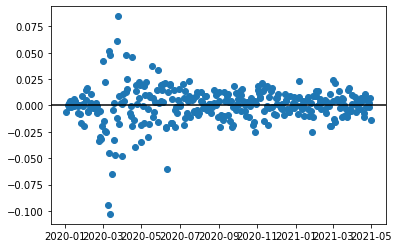

In [ ]:
plt.scatter(RPP2_c.Date,res)
plt.axhline(color="black")

Sin patrones visibles en los residuales

### **Independencia**

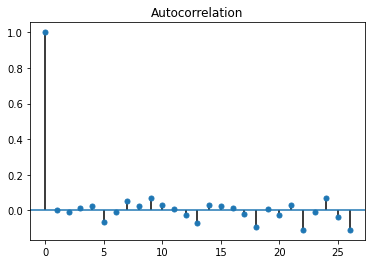

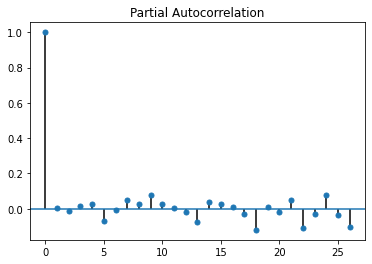

(array([0.00888836]),
 array([0.92488827]),
 array([0.00880899]),
 array([0.92522335]))

In [ ]:
pmd.plot_acf(res)
pmd.plot_pacf(res)
sm.stats.acorr_ljungbox(res,lags=1,boxpierce=True)

#### Prueba de hipótesis
H0: residuales independientes

H1: residuales relacionados

Criterio: Rechazamos H0 si p-valor<alfa(0.05)

P-valor=0.925223>0.05, con un 95% de confianza no rechazamos H0

**Los residuales son independientes**

**Hasta aquí cumple con Ruido blanco** 

### **Normalidad**

In [ ]:
stats.shapiro(res)

(0.8750771284103394, 8.108184771109164e-16)

#### Prueba de hipótesis
H0: los residuales provienen de una distribución normal

H1: los residuales provienen de alguna otra distribución

Criterio: Rechazamos H0 si p-valor<alfa(0.05)

P-valor=8.108216005449094e-16<0.05, con un 95% de confianza rechazamos H0

**Los residuales no cumplen normalidad, Ruido blanco no gaussiano**

## **Predicciones de NYA**

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  The location of the key
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  


335    16183.503431
336    16216.452116
337    16139.208927
338    16222.524441
339    16140.205769
340    16211.742890
341    16155.507049
342    16194.953716
343    16171.474369
344    16181.366529
345    16181.917831
346    16174.255764
347    16185.944588
348    16172.798442
349    16185.473912
350    16174.540741
351    16183.053200
352    16177.156446
353    16180.596380
354    16179.229093
355    16179.019646
Name: Predicciones NYA, dtype: float64

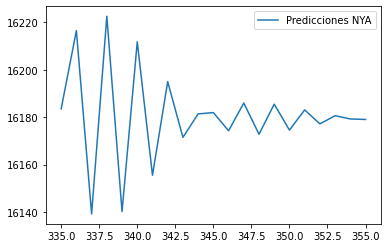

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
modelo=SARIMAX(RPP2["CloseUSD"],order=(4,1,1))
result=modelo.fit()
forecast = result.predict(start = len(RPP2),end = (len(RPP2)-1) + 3 * 7,typ = 'levels').rename('Predicciones NYA')

#RPP2["CloseUSD"].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)
forecast

## HSI

In [ ]:
NHSI=NNIP[NNIP.Index=="HSI"]
NHSI.head(5)

,Index,Open,High,Low,Close,Adj Close,Volume,CloseUSD
Date,,,,,,,,
1986-12-31,HSI,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1987-01-02,HSI,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
1987-01-05,HSI,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
1987-01-06,HSI,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
1987-01-07,HSI,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013


In [ ]:
EHSI=NHSI.drop(columns=['Open','High','Low','Close','Adj Close','Volume'])
EHSI.head(6)

,Index,CloseUSD
Date,,
1986-12-31,HSI,333.879006
1987-01-02,HSI,330.213013
1987-01-05,HSI,331.811987
1987-01-06,HSI,335.906987
1987-01-07,HSI,338.923013
1987-01-08,HSI,338.429006


In [ ]:
HPP = EHSI['2020-01-01':'2021-05-01']
HPP.head()

,Index,CloseUSD
Date,,
2020-01-02,HSI,3710.657539
2020-01-03,HSI,3698.695000
2020-01-06,HSI,3669.404628
2020-01-07,HSI,3681.867872
2020-01-08,HSI,3651.429590


### Revisando estacionariedad en media

In [ ]:
import matplotlib.pyplot as plt
x = np.arange(HPP.reset_index()['Date'].size)
fit = np.polyfit(x, HPP['CloseUSD'], deg=1)
print ("Slope : " + str(fit[0]))
print ("Intercept : " + str(fit[1]))

Slope : 1.46377204742463
Intercept : 3168.2959959634527


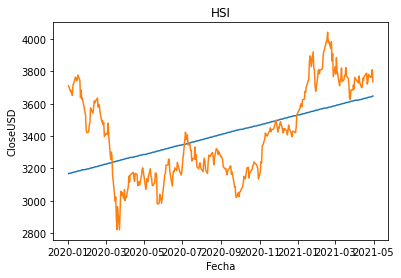

In [ ]:
fit_function = np.poly1d(fit)
plt.plot(HPP.reset_index()['Date'], fit_function(x))
plt.plot(HPP.reset_index()['Date'], HPP['CloseUSD'])

plt.xlabel('Fecha')
plt.ylabel('CloseUSD')
plt.title('HSI')
plt.show()

Visualmente parece que se tiene tendencia lineal

In [ ]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = np.arange(HPP.reset_index()['Date'].size).reshape(-1, 1)
y2 = HPP['CloseUSD']
X3 = sm.add_constant(X2)
est2 = sm.OLS(y2, X3)
est3 = est2.fit()
print(est3.summary())

                            OLS Regression Results                            
Dep. Variable:               CloseUSD   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     113.2
Date:                Mon, 18 Oct 2021   Prob (F-statistic):           6.93e-23
Time:                        19:49:44   Log-Likelihood:                -2256.5
No. Observations:                 328   AIC:                             4517.
Df Residuals:                     326   BIC:                             4525.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3168.2960     25.997    121.871      0.0

#### **Prueba de hipótesis**

**H0**: la serie no tiene tendencia

**H1**: la serie tiene tendencia

Criterio: Rechazamos H0 si p-valor<alfa(0.05)

P-valor=0.000<0.05, con un 95% de confianza rechazamos H0

**La serie es no estacionaria en media**

### Revisando estacionariedad en varianza con la Prueba Dickey-Fuller Aumentada

In [ ]:
HPP2=HPP.drop(columns=['Index'])
HPP2.head(6)

,CloseUSD
Date,
2020-01-02,3710.657539
2020-01-03,3698.695000
2020-01-06,3669.404628
2020-01-07,3681.867872
2020-01-08,3651.429590
2020-01-09,3712.930000


In [ ]:
adf_test(HPP2['CloseUSD'])

Resultados de la prueba Dickey-Fuller:
Test Statistic                     -1.467262
p-valor                             0.549640
#Lags Used                          2.000000
Numero de observaciones usadas    325.000000
Critical Value (1%)                -3.450632
Critical Value (5%)                -2.870474
Critical Value (10%)               -2.571530
dtype: float64


#### Prueba de hipótesis
H0: la serie no es estacionaria

H1: la serie es estacionaria

Criterio: Rechazamos H0 si p-valor<alfa(0.05)

P-valor=0.549640>0.05, con un 95% de confianza no rechazamos H0

**La serie es no estacionaria en varianza**

## **Se tiene que corregir la serie para hacerse estacionaria**

### Correcciones

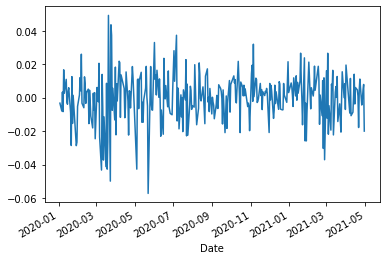

In [ ]:
HPP2['CloseUSD_log'] = np.log(HPP2['CloseUSD'])
HPP2['CloseUSD_log_diff'] = HPP2['CloseUSD_log'] - HPP2['CloseUSD_log'].shift(1)
HPP2['CloseUSD_log_diff'].dropna().plot()

### Revisando estacionariedad en media

In [ ]:
HPP2_c = HPP2.reset_index().drop([0], axis=0)
HPP2_c

,Date,CloseUSD,CloseUSD_log,CloseUSD_log_diff
1,2020-01-03,3698.695000,8.215735,-0.003229
2,2020-01-06,3669.404628,8.207785,-0.007951
3,2020-01-07,3681.867872,8.211175,0.003391
4,2020-01-08,3651.429590,8.202874,-0.008301
5,2020-01-09,3712.930000,8.219577,0.016703
...,...,...,...,...
323,2021-04-26,3763.867910,8.233202,-0.004340
324,2021-04-27,3762.400078,8.232812,-0.000390
325,2021-04-28,3779.274179,8.237287,0.004475
326,2021-04-29,3809.423770,8.245233,0.007946


In [ ]:
x = np.arange(HPP2_c['Date'].size)
fit = np.polyfit(x,HPP2_c['CloseUSD_log_diff'], deg=1)
print ("Slope : " + str(fit[0]))
print ("Intercept : " + str(fit[1]))

Slope : 1.0304674795264516e-05
Intercept : -0.0016602927180104415


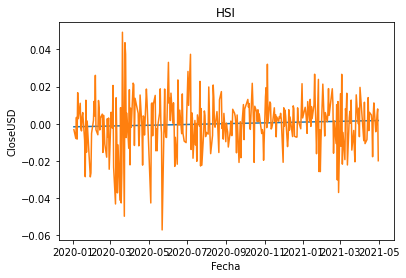

In [ ]:
fit_function = np.poly1d(fit)
plt.plot(HPP2_c['Date'], fit_function(x))
plt.plot(HPP2_c['Date'], HPP2_c['CloseUSD_log_diff'])

plt.xlabel('Fecha')
plt.ylabel('CloseUSD')
plt.title('HSI')
plt.show()

Visualmente parece que no se tiene tendencia

In [ ]:
X = np.arange(HPP2_c['Date'].size).reshape(-1, 1)
y = HPP2_c['CloseUSD_log_diff']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:      CloseUSD_log_diff   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.485
Date:                Mon, 18 Oct 2021   Prob (F-statistic):              0.224
Time:                        19:50:06   Log-Likelihood:                 922.86
No. Observations:                 327   AIC:                            -1842.
Df Residuals:                     325   BIC:                            -1834.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0017      0.002     -1.042      0.2

#### Prueba de hipótesis

H0: la serie no tiene tendencia

H1: la serie tiene tendencia

Criterio: Rechazamos H0 si p-valor<alfa(0.05)

P-valor=0.224>0.05, con un 95% de confianza no rechazamos H0

**La serie es estacionaria en media**


### Revisando estacionariedad en varianza con la Prueba Dickey-Fuller Aumentada



In [ ]:
adf_test(HPP2['CloseUSD_log_diff'].dropna())

Resultados de la prueba Dickey-Fuller:
Test Statistic                    -20.085589
p-valor                             0.000000
#Lags Used                          0.000000
Numero de observaciones usadas    326.000000
Critical Value (1%)                -3.450569
Critical Value (5%)                -2.870447
Critical Value (10%)               -2.571515
dtype: float64


#### Prueba de hipótesis
H0: la serie no es estacionaria

H1: la serie es estacionaria

Criterio: Rechazamos H0 si p-valor<alfa(0.05)

P-valor=0.000000<0.05, con un 95% de confianza rechazamos H0

**La serie es estacionaria en media y varianza**

## **Modelo ARIMA**

In [ ]:
arima_model2 = arimamodel(HPP2['CloseUSD_log_diff'].dropna())
arima_model2.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1841.188, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1840.235, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1842.331, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1841.791, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1842.235, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1841.734, Time=0.28 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1839.786, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-1844.330, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-1843.733, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1843.181, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-1843.814, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-1841.785, Time=0.20 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.386 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  327
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 924.165
Date:                Mon, 18 Oct 2021   AIC                          -1844.330
Time:                        19:50:14   BIC                          -1836.750
Sample:                             0   HQIC                         -1841.305
                                - 327                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1120      0.042     -2.676      0.007      -0.194      -0.030
sigma2         0.0002    1.2e-05     17.164      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                       34.72   Jarque-Bera (JB):                45.87
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                            -0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

En el resultado anterior, se obtuvo el valor AIC más bajo de -1844.330 para el modelo ARIMA (1, 0, 0)

## **Supuestos de ruido blanco**


In [ ]:
res2=arima_model2.resid()

### **Media**

In [ ]:
res2.mean()

2.837023890230776e-05

Cumple con el supuesto de media cero

### **Varianza**

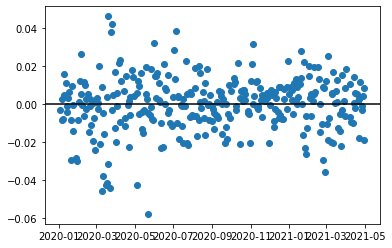

In [ ]:
plt.scatter(HPP2_c.Date,res2)
plt.axhline(color="black")

Sin patrones visibles en los residuales

### **Independencia**

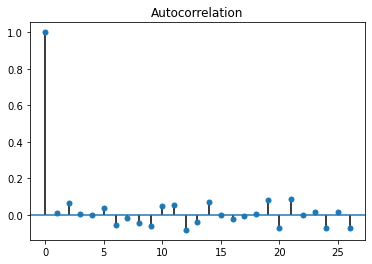

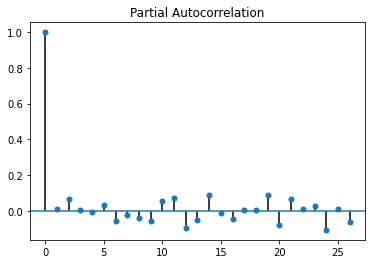

(array([0.01768208]),
 array([0.89421394]),
 array([0.01752085]),
 array([0.89469453]))

In [ ]:
pmd.plot_acf(res2)
pmd.plot_pacf(res2)
sm.stats.acorr_ljungbox(res2,lags=1,boxpierce=True)

#### Prueba de hipótesis
H0: residuales independientes

H1: residuales relacionados

Criterio: Rechazamos H0 si p-valor<alfa(0.05)

P-valor=0.894695>0.05, con un 95% de confianza no rechazamos H0

**Los residuales son independientes**

**Hasta aquí cumple con Ruido blanco** 

### **Normalidad**

In [ ]:
stats.shapiro(res2)

(0.9734405279159546, 9.97500592347933e-06)

#### Prueba de hipótesis
H0: los residuales provienen de una distribución normal

H1: los residuales provienen de alguna otra distribución

Criterio: Rechazamos H0 si p-valor<alfa(0.05)

P-valor=9.97500592347933e-06<0.05, con un 95% de confianza rechazamos H0

**Los residuales no cumplen normalidad, Ruido blanco no gaussiano**

## **Predicciones de HSI**

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  The location of the key
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  


328    3742.806845
329    3741.829512
330    3741.940938
331    3741.928234
332    3741.929683
333    3741.929518
334    3741.929536
335    3741.929534
336    3741.929534
337    3741.929534
338    3741.929534
339    3741.929534
340    3741.929534
341    3741.929534
342    3741.929534
343    3741.929534
344    3741.929534
345    3741.929534
346    3741.929534
347    3741.929534
348    3741.929534
Name: Predicciones HSI, dtype: float64

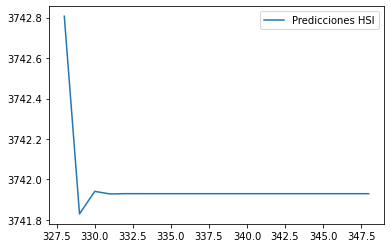

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
modelo2=SARIMAX(HPP2["CloseUSD"],order=(1,1,0))
result2=modelo2.fit()
forecast2 = result2.predict(start = len(HPP2),end = (len(HPP2)-1) + 3 * 7,typ = 'levels').rename('Predicciones HSI')

#RPP2["CloseUSD"].plot(figsize = (12, 5), legend = True)
forecast2.plot(legend = True)
forecast2

## GSPTSE

In [ ]:
NGSPTSE=NNIP[NNIP.Index=="GSPTSE"]
NGSPTSE.head(5)

,Index,Open,High,Low,Close,Adj Close,Volume,CloseUSD
Date,,,,,,,,
1979-06-29,GSPTSE,1614.699951,1619.800049,1614.699951,1618.400024,1614.290039,0.0,1343.272020
1979-07-03,GSPTSE,1613.599976,1613.599976,1601.699951,1602.800049,1598.729858,0.0,1330.324041
1979-07-04,GSPTSE,1601.500000,1601.500000,1589.500000,1591.400024,1587.358765,0.0,1320.862020
1979-07-05,GSPTSE,1590.000000,1590.000000,1582.500000,1583.900024,1579.877686,0.0,1314.637020
1979-07-06,GSPTSE,1583.900024,1586.599976,1578.300049,1586.599976,1582.570923,0.0,1316.877980


In [ ]:
EGSP=NGSPTSE.drop(columns=['Open','High','Low','Close','Adj Close','Volume'])
EGSP.head(6)

,Index,CloseUSD
Date,,
1979-06-29,GSPTSE,1343.272020
1979-07-03,GSPTSE,1330.324041
1979-07-04,GSPTSE,1320.862020
1979-07-05,GSPTSE,1314.637020
1979-07-06,GSPTSE,1316.877980
1979-07-09,GSPTSE,1316.629041


In [ ]:
GSP = EGSP['2020-01-01':'2021-05-01']
GSP.head()

,Index,CloseUSD
Date,,
2020-01-02,GSPTSE,14193.000000
2020-01-03,GSPTSE,14164.862676
2020-01-06,GSPTSE,14197.565000
2020-01-07,GSPTSE,14249.522676
2020-01-08,GSPTSE,14249.274647


### Revisando estacionariedad en media

In [ ]:
import matplotlib.pyplot as plt
x = np.arange(GSP.reset_index()['Date'].size)
fit = np.polyfit(x, GSP['CloseUSD'], deg=1)
print ("Slope : " + str(fit[0]))
print ("Intercept : " + str(fit[1]))

Slope : 8.824277834461913
Intercept : 12329.723082211429


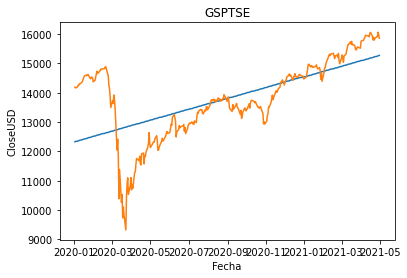

In [ ]:
fit_function = np.poly1d(fit)
plt.plot(GSP.reset_index()['Date'], fit_function(x))
plt.plot(GSP.reset_index()['Date'], GSP['CloseUSD'])

plt.xlabel('Fecha')
plt.ylabel('CloseUSD')
plt.title('GSPTSE')
plt.show()

Visualmente parece que se tiene tendencia lineal

In [ ]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = np.arange(GSP.reset_index()['Date'].size).reshape(-1, 1)
y2 = GSP['CloseUSD']
X3 = sm.add_constant(X2)
est2 = sm.OLS(y2, X3)
est3 = est2.fit()
print(est3.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:               CloseUSD   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     228.7
Date:                Mon, 18 Oct 2021   Prob (F-statistic):           1.07e-39
Time:                        18:35:09   Log-Likelihood:                -2799.3
No. Observations:                 335   AIC:                             5603.
Df Residuals:                     333   BIC:                             5610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.233e+04    112.607    109.493      0.0

#### **Prueba de hipótesis**

**H0**: la serie no tiene tendencia

**H1**: la serie tiene tendencia

Criterio: Rechazamos H0 si p-valor<alfa(0.05)

**P-valor=0.000<0.05**, con un 95% de confianza rechazamos H0

**La serie es no estacionaria en media**

### Revisando estacionariedad en varianza con la Prueba Dickey-Fuller Aumentada

In [ ]:
GSP2=GSP.drop(columns=['Index'])
GSP2.head(6)

,CloseUSD
Date,
2020-01-02,14193.000000
2020-01-03,14164.862676
2020-01-06,14197.565000
2020-01-07,14249.522676
2020-01-08,14249.274647
2020-01-09,14305.547676


In [ ]:
adf_test(GSP2['CloseUSD'])

Resultados de la prueba Dickey-Fuller:
Test Statistic                     -1.732057
p-valor                             0.414676
#Lags Used                          9.000000
Numero de observaciones usadas    325.000000
Critical Value (1%)                -3.450632
Critical Value (5%)                -2.870474
Critical Value (10%)               -2.571530
dtype: float64


#### **Prueba de hipótesis**
**H0**: la serie no es estacionaria

**H1**: la serie es estacionaria

Criterio: Rechazamos H0 si p-valor<alfa(0.05)

**P-valor=0.414676>0.05**, con un 95% de confianza no rechazamos H0

**La serie es no estacionaria en varianza**


## **Se tiene que corregir la serie para hacerse estacionaria**

### Correcciones

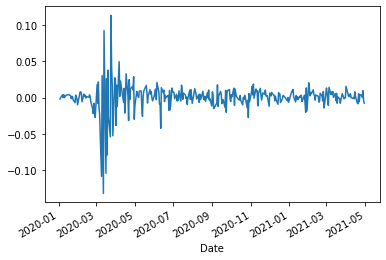

In [ ]:
GSP2['CloseUSD_log'] = np.log(GSP2['CloseUSD'])
GSP2['CloseUSD_log_diff'] = GSP2['CloseUSD_log'] - GSP2['CloseUSD_log'].shift(1)
GSP2['CloseUSD_log_diff'].dropna().plot()


### Revisando estacionariedad en media

In [ ]:
GSP2_c = GSP2.reset_index().drop([0], axis=0)
GSP2_c

,Date,CloseUSD,CloseUSD_log,CloseUSD_log_diff
1,2020-01-03,14164.862676,9.558520,-0.001984
2,2020-01-06,14197.565000,9.560826,0.002306
3,2020-01-07,14249.522676,9.564479,0.003653
4,2020-01-08,14249.274647,9.564461,-0.000017
5,2020-01-09,14305.547676,9.568403,0.003941
...,...,...,...,...
330,2021-04-26,15911.597676,9.674804,0.003569
331,2021-04-27,15915.332676,9.675038,0.000235
332,2021-04-28,16066.310000,9.684480,0.009442
333,2021-04-29,15982.397324,9.679243,-0.005237


In [ ]:
x = np.arange(GSP2_c['Date'].size)
fit = np.polyfit(x,GSP2_c['CloseUSD_log_diff'], deg=1)
print ("Slope : " + str(fit[0]))
print ("Intercept : " + str(fit[1]))

Slope : 9.529748894303975e-06
Intercept : -0.0012542350084283158


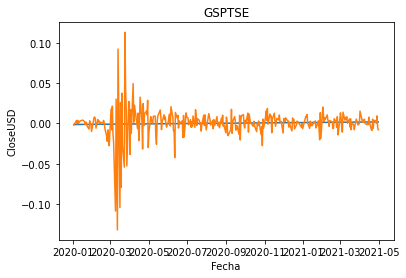

In [ ]:
fit_function = np.poly1d(fit)
plt.plot(GSP2_c['Date'], fit_function(x))
plt.plot(GSP2_c['Date'], GSP2_c['CloseUSD_log_diff'])

plt.xlabel('Fecha')
plt.ylabel('CloseUSD')
plt.title('GSPTSE')
plt.show()

Visualmente parece que no se tiene tendencia

In [ ]:
X = np.arange(GSP2_c['Date'].size).reshape(-1, 1)
y = GSP2_c['CloseUSD_log_diff']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:      CloseUSD_log_diff   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8128
Date:                Mon, 18 Oct 2021   Prob (F-statistic):              0.368
Time:                        19:07:00   Log-Likelihood:                 857.46
No. Observations:                 334   AIC:                            -1711.
Df Residuals:                     332   BIC:                            -1703.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.002     -0.617      0.5

#### **Prueba de hipótesis**

**H0**: la serie no tiene tendencia

**H1**: la serie tiene tendencia

Criterio: Rechazamos H0 si p-valor<alfa(0.05)

**P-valor=0.368>0.05**, con un 95% de confianza no rechazamos H0

**La serie es estacionaria en media**

### Revisando estacionariedad en varianza con la Prueba Dickey-Fuller Aumentada

In [ ]:
adf_test(GSP2['CloseUSD_log_diff'].dropna())

Resultados de la prueba Dickey-Fuller:
Test Statistic                     -5.570475
p-valor                             0.000001
#Lags Used                          6.000000
Numero de observaciones usadas    327.000000
Critical Value (1%)                -3.450507
Critical Value (5%)                -2.870420
Critical Value (10%)               -2.571501
dtype: float64



#### **Prueba de hipótesis**
**H0**: la serie no es estacionaria

**H1**: la serie es estacionaria

Criterio: Rechazamos H0 si p-valor<alfa(0.05)

**P-valor=0.000001<0.05**, con un 95% de confianza rechazamos H0

**La serie es estacionaria en media y varianza**


## **Modelo ARIMA**

In [ ]:
arima_model3 = arimamodel(GSP2['CloseUSD_log_diff'].dropna())
arima_model3.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1731.309, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1710.106, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1731.812, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1726.288, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1711.999, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1732.918, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1737.305, Time=0.12 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-1736.774, Time=0.12 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1737.768, Time=0.78 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1738.342, Time=0.61 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1735.963, Time=0.66 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1739.339, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1737.463, Time=0.14 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1741.518, Time=0.82 sec
 ARIMA(0,0,3)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  334
Model:               SARIMAX(5, 0, 4)   Log Likelihood                 895.864
Date:                Mon, 18 Oct 2021   AIC                          -1771.729
Time:                        19:26:51   BIC                          -1733.618
Sample:                             0   HQIC                         -1756.533
                                - 334                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3880      0.082    -17.003      0.000      -1.548      -1.228
ar.L2         -0.9147      0.176     -5.186      0.000      -1.260      -0.569
ar.L3         -0.1934      0.216     -0.896      0.370      -0.616       0.229
ar.L4          0.3199      0.142      2.257      0.024       0.042       0.598
ar.L5          0.3522      0.036      9.778      0.000       0.282       0.423
ma.L1          1.2114      0.101     11.979      0.000       1.013       1.410
ma.L2          0.7957      0.204      3.894      0.000       0.395       1.196
ma.L3          0.3262      0.240      1.358      0.174      -0.144       0.797
ma.L4         -0.0241      0.133     -0.181      0.856      -0.285       0.237
sigma2         0.0003   8.14e-06     33.516      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                       29.13   Jarque-Bera (JB):              5569.99
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.08   Skew:                            -1.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Se obtuvo que el mejor modelo es un ARIMA(5,0,4), debido a que su AIC fue el más bajo con -1771.729

## **Supuestos de ruido blanco**

In [ ]:
res3=arima_model3.resid()

### **Media**

In [ ]:
res3.mean()

0.0002782099523244686

Cumple con el supuesto de media cero

### **Varianza**

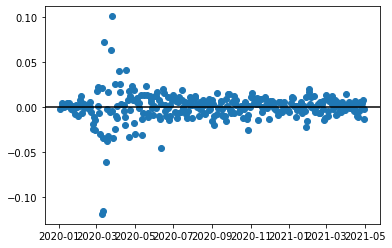

In [ ]:
plt.scatter(GSP2_c.Date,res3)
plt.axhline(color="black")

Sin patrones visibles en los residuales

### **Independencia**

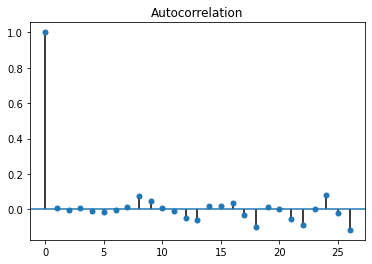

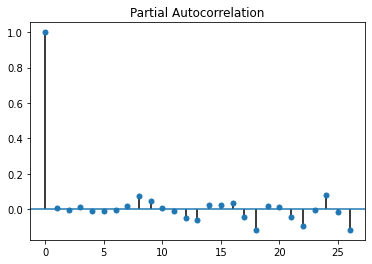

(array([0.01578342]),
 array([0.90002316]),
 array([0.0156425]),
 array([0.90046815]))

In [ ]:
pmd.plot_acf(res3)
pmd.plot_pacf(res3)
sm.stats.acorr_ljungbox(res3,lags=1,boxpierce=True)

#### **Prueba de hipótesis**
**H0**: residuales independientes

**H1**: residuales relacionados

Criterio: Rechazamos H0 si p-valor<alfa(0.05)

**P-valor=0.90002316>0.05**, con un 95% de confianza no rechazamos H0

**Los residuales son independientes**

**Hasta aquí cumple con Ruido blanco** 


### **Normalidad**

In [ ]:
stats.shapiro(res3)

(0.7533789277076721, 5.238632158423141e-22)

#### **Prueba de hipótesis**
**H0**: los residuales provienen de una distribución normal

**H1**: los residuales provienen de alguna otra distribución

Criterio: Rechazamos H0 si p-valor<alfa(0.05)

**P-valor=5.238632158423141e-22**<0.05, con un 95% de confianza rechazamos H0

**Los residuales no cumplen normalidad, Ruido blanco no gaussiano**


## **Predicciones de GSPTSE**

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  The location of the key
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  self.k_ar > 0 and
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  


335    15866.132474
336    15856.838679
337    15835.400063
338    15805.520978
339    15832.119717
340    15828.566823
341    15814.159869
342    15818.263622
343    15821.254947
344    15824.978904
345    15813.396084
346    15821.250437
347    15821.025845
348    15819.486162
349    15818.853398
350    15818.901004
351    15821.967564
352    15817.793044
353    15820.210027
354    15819.443574
355    15820.089627
Name: Predicciones GSPTSE, dtype: float64

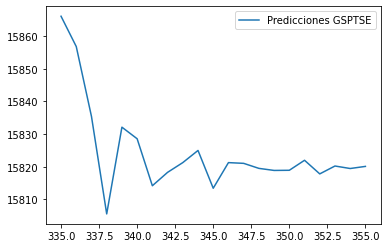

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
modelo3=SARIMAX(GSP2["CloseUSD"],order=(5,1,4))
result3=modelo3.fit()
forecast3 = result3.predict(start = len(GSP2),end = (len(GSP2)-1) + 3 * 7,typ = 'levels').rename('Predicciones GSPTSE')

#RPP2["CloseUSD"].plot(figsize = (12, 5), legend = True)
forecast3.plot(legend = True)
forecast3

## Comparación de las predicciones 

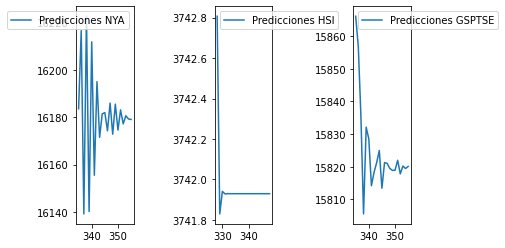

In [ ]:
subplot(1,5,1,adjustable='datalim')
forecast.plot(legend = True)
subplot(1,5,3,adjustable='datalim')
forecast2.plot(legend = True)
subplot(1,5,5,adjustable='datalim')
forecast3.plot(legend=True)

# **Conclusión Final**

Se obtuvieron las predicciones de 20 días después del 30 de Abril de 2021 para los índices. 

Los futuros de índices son la principal forma de operar sobre índices bursátiles. Sin un activo físico de por medio, la mayoría de las operaciones sobre índices ocurre a través de estos productos derivados llamados "futuros".

Los futuros de índices se negocian de la misma forma que todos los demás contratos de futuros. Al adquirir futuros de índices, estarás negociando un contrato a plazo, es decir, pactando en el presente la cantidad específica y el precio de compra o venta que entrará en efecto en un fecha también preestablecida.

**Posición larga**

Al elegir una posición larga, estarás comprando el índice a un precio fijo ahora, para que venza en una fecha fijada en el futuro. Harías esto si esperas que el precio del índice suba entre el momento actual y la fecha de caducidad, para así beneficiarte al vender por un precio superior al pagado.

El índice NYA fluctúa casi diariamente entre un rango de 16140 a 16220. Un inversionista en posición larga podría comprar el NYA a un precio moderado y esperar a que en sus constantes fluctuaciones tenga la oportunidad de vender a un precio alto.

**Posición corta**

Esto significaría que ahora estás vendiendo el índice a un precio fijo, para que venza en una fecha fijada en el futuro. Harías esto si pensaras que el precio del índice va a caer entre el momento actual y la fecha de caducidad, para beneficiarte al comprar a un precio inferior.

Podemos observar que en los índices HSI y GSPTSE se predice que tendrán una caída en su precio en los siguientes días, el HSI se mantendrá estable días después, mientras que el GSPTSE intentará recuperarse pero su precio seguirá fluctuando. 

Desde una posición corta, convendría vender ya sea el índice HSI o GSPTSE dadas sus expectativas bajistas. 

## Trabajo a futuro

Nos gustaría la oportunidad de mejorar la parte final del trabajo, de manera que los resultados sean visualmente más entendibles y presentables. En caso de lograr esto, otra mejora que le podríamos dar a futuro es agregarle a la base de datos más registros que lleguen hasta el presente y obtener las predicciones a futuro.